##**Simple Linear Regression**##
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables

**Required libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression  
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, r2_score, confusion_matrix



**Getting the Dataset**

In [ ]:
 
dataset=pd.read_csv("/content/drive/My Drive/Colab Notebooks/spark/spark grip/supervised machine learning/student_scores - student_scores.csv")
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


**Some descriptive statistics measures of the data**

In [ ]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


**To find that is there any relation between the Hours and the percentage**


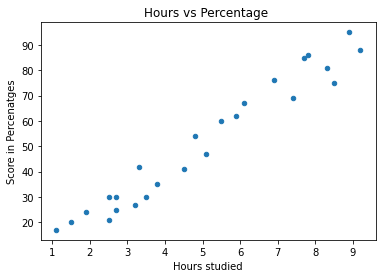

In [ ]:
dataset.plot(kind='scatter',x="Hours",y='Scores')
plt.title("Hours vs Percentage ")
plt.xlabel("Hours studied")
plt.ylabel("Score in Percenatges")
plt.show()


**We can see that there is a positive linear relation between hours studied and Percentage scored.**



## DATA PREPROCESSING


In [ ]:
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,1].values

[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


In [ ]:
# splitting the dataset 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

**Training Algorithm**

In [ ]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Visualising Training set result**

Coefficient - 9.91   This means Score will increase by 9 % if there is a unit change in Hours studied
Intercept - 2.02     This means that a student will score 2% if he doesn't study at all(for zero hour)


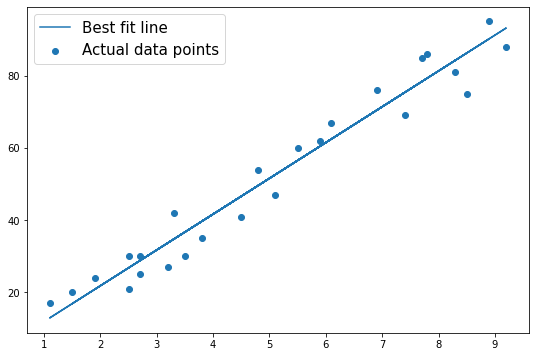

In [ ]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.figure(figsize = (9, 6))

plt.scatter(X, y,label="Actual data points")
plt.plot(X, line,label="Best fit line");
plt.legend(fontsize = 15);
print("Coefficient - {:.2f}".format(regressor.coef_[0]), "  This means Score will increase by 9 % if there is a unit change in Hours studied")
print("Intercept - {:.2f}".format(regressor.intercept_ ),"    This means that a student will score 2% if he doesn't study at all(for zero hour)")

**Making Predictions**

In [ ]:
y_pred=regressor.predict(X_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

**Comparing the actual and predicted value**

In [ ]:
comparison=pd.DataFrame({'Actual':y_test,'Predicted':y_pred},)
comparison


,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


**Visualising the test set result**

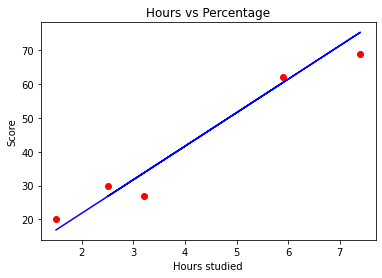

In [ ]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, regressor.predict(X_test), color = 'blue')
plt.title('Hours vs Percentage')
plt.xlabel('Hours studied')
plt.ylabel('Score')
plt.show()

**Evaluating the model**

In [ ]:
print('Score:', regressor.score(X_test, y_test))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('r2 Score:', r2_score(y_test, y_pred))

Score: 0.9454906892105354
Mean Absolute Error: 4.183859899002982
Root Mean Squared Error: 4.647447612100373
r2 Score: 0.9454906892105354


#What will be predicted score if a student study for 9.25 hrs in a day?

In [ ]:
hours= [[9.25]]
score = regressor.predict(hours)
print("No of Hours studied  = {}".format(hours[0][0]))
print("Predicted Score  = {:.2f}{}".format(score[0],' %'))

No of Hours studied  = 9.25
Predicted Score  = 93.69 %


**This implies that a student will score 93 % if he/she studies for 9.25 hrs.**